In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [21]:
bank=pd.read_csv('F:\\python\\EXCEL\\bank-full.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [32]:
bank_label=bank.copy()
bank_label

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
bank_label.iloc[:,-1]=labelencoder.fit_transform(bank_label.iloc[:,-1])     
bank_label.iloc[:,1]=labelencoder.fit_transform(bank_label.iloc[:,1])
bank_label.iloc[:,2]=labelencoder.fit_transform(bank_label.iloc[:,2])
bank_label.iloc[:,3]=labelencoder.fit_transform(bank_label.iloc[:,3])
bank_label.iloc[:,4]=labelencoder.fit_transform(bank_label.iloc[:,4])
bank_label.iloc[:,6]=labelencoder.fit_transform(bank_label.iloc[:,6])
bank_label.iloc[:,7]=labelencoder.fit_transform(bank_label.iloc[:,7])
bank_label.iloc[:,8]=labelencoder.fit_transform(bank_label.iloc[:,8])
bank_label.iloc[:,10]=labelencoder.fit_transform(bank_label.iloc[:,10])
bank_label.iloc[:,-2]=labelencoder.fit_transform(bank_label.iloc[:,-2])

In [34]:
bank_label

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [65]:
bank_label.shape

(45211, 17)

In [66]:
bank_label.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [69]:
x=bank_label.iloc[:,0:16]
y=bank_label.iloc[:,16]

In [76]:
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
classifier.coef_

array([[-3.16724811e-02,  1.45321976e-02, -9.21049853e-02,
        -1.31806616e-02, -4.79226712e-03,  3.99840879e-05,
        -1.81543914e-01, -5.34877723e-02, -1.86705675e-01,
        -8.41504582e-03, -6.01320861e-02,  3.27071630e-03,
        -2.66998669e-01, -1.23894064e-03,  1.19974189e-01,
        -1.80531761e-01]])

In [73]:
Beta_coefficients=pd.Series(classifier.coef_[0])

In [74]:
Beta_coefficients

0    -0.031672
1     0.014532
2    -0.092105
3    -0.013181
4    -0.004792
5     0.000040
6    -0.181544
7    -0.053488
8    -0.186706
9    -0.008415
10   -0.060132
11    0.003271
12   -0.266999
13   -0.001239
14    0.119974
15   -0.180532
dtype: float64

In [59]:
bank_label.iloc[0:0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [60]:
coef_df=pd.DataFrame({'variables':['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome'],'Beta_coefficients':Beta_coefficients})

In [61]:
coef_df

,variables,Beta_coefficients
0,age,-0.031672
1,job,0.014532
2,marital,-0.092105
3,education,-0.013181
4,default,-0.004792
5,balance,0.000040
6,housing,-0.181544
7,loan,-0.053488
8,contact,-0.186706
9,day,-0.008415


# Interpretations

In [79]:
classifier.intercept_

array([-0.07050063])

In [80]:
classifier.classes_

array([0, 1])

In [81]:
classifier.predict_proba(x)

array([[0.94853132, 0.05146868],
       [0.94887945, 0.05112055],
       [0.94695894, 0.05304106],
       ...,
       [0.67200811, 0.32799189],
       [0.94034414, 0.05965586],
       [0.58201746, 0.41798254]])

In [83]:
ypred=classifier.predict(x)

In [84]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
y_pred_df=pd.DataFrame({'actual':y,'predicted':classifier.predict(x)})
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [86]:
classifier.score(x,y)

0.8876158457012674

# Confusion Matrix

In [87]:
TP=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predicted']==1)])
TN=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predicted']==0)])
FP=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predicted']==1)])
FN=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predicted']==0)])

In [88]:
print('True positives', TP)
print('True negatives', TN)
print('False positives', FP)
print('False negatives', FN)

True positives 851
True negatives 39279
False positives 643
False negatives 4438


In [89]:
from sklearn.metrics import confusion_matrix

In [91]:
cm=confusion_matrix(y,ypred)
cm

array([[39279,   643],
       [ 4438,   851]], dtype=int64)

In [93]:
 # Checking for accuracy
accuracy=((39279+851)/(39279+643+4438+851)*100)
accuracy

88.76158457012674

In [95]:
# Checking for specificity/Recall

Recall=(TN)/(TN+FP)
print('Recall', round(Recall,2))

Recall 0.98


In [97]:
# Manual calculation of Recall/Specificity
((39279)/(39279+643))*100

98.38935925053856

In [98]:
# Checking for Sensitivity
#(851)/(851+4438)
sensitivity=(TP)/(TP+FN)
print("sensitivity",round(sensitivity,2))

sensitivity 0.16


In [99]:
# Checking for precision=(TP)/(TP+FP)
#(851)/(851+643)
precision=(TP)/(TP+FP)
print('precision',round(precision,2))

precision 0.57


In [100]:
# Manual Calculation for Precision 
(851)/(851+643)

0.5696117804551539

In [101]:
# Checking for "F-SCORES"
F_score=(2*Recall*sensitivity)/(Recall+sensitivity)
print('F_score',round(F_score,2))

F_score 0.28


0.5723967867991099


Text(0, 0.5, 'True positive rate')

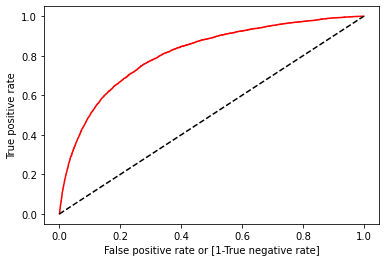

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])

auc=roc_auc_score(y,ypred)
print(auc)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr,color='red',label='logit model (area=%0.2f)'%auc)

plt.plot([0,1],[0,1],'k--')

plt.xlabel("False positive rate or [1-True negative rate]")
plt.ylabel("True positive rate")